In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
% autoreload 2

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
import sys
sys.path.append('/users/amyskerry/documents/projects')
from pybq import core, util, bqdf
from pybq import credentialscfg as cfg

#Utility functions for viewing/modifying what data are available 

service=util.get_service()
projects=util.list_projects(service)
datasets=util.list_datasets(service, 'durable-footing-95814')
tables=util.list_tables(service, 'eeg4kaggle', 'eeg')
util.delete_table(service, 'eeg4kaggle', 'eeg', 'temp2')
util.copy_table(source, destination)

#Connect to a project

In [8]:
cfg.project_id

'durable-footing-95814'

In [10]:
#connect to project via project_id
client = core.bigquery_connect(project_id=cfg.project_id, logging_file=cfg.log)

In [7]:
#specify bq paths to tables
#format: project:dataset.tablename (if dataset is in current project_id, can use just dataset.tablename)
table1 = '[fh-bigquery:reddit.subreddits]' 
table2 = '[fh-bigquery:reddit.top20]'

# Dataframe-ish abstraction for bigquery table

In [8]:
#create bqdf table connection
df1 = bqdf.BQDF(client, table1)
df2 = bqdf.BQDF(client, table2)

In [9]:
#these are not actually dataframes, but rather references to connected bigquery tables
#table referenced:
print df1.remote

[fh-bigquery:reddit.subreddits]


In [10]:
#connected to project by client
print df1.client

In [11]:
#a local copy or sample of the data is stored in df.local
#by default, local contains only a copy of the first 5 rows (the table's "head")
#but bqdf queries (incl built in joins, group bys, etc.) can also copy full result to df.local (if fetch=True)
df1.local

,subr,created_utc,score,num_comments,c_posts,ups,downs
0,Winnipeg,1271800307,35017,23782,1000,41170,6153
1,winterporn,1322432778,61256,1858,1000,66831,5575
2,wisconsin,1288755087,71500,24893,999,87718,16218
3,woahdude,1272095272,2089822,126829,1000,4970101,2880279
4,women,1221247390,63478,12128,1000,74948,11470


##Basic convenience operations

In [12]:
# standard df head
df1.head()

,subr,created_utc,score,num_comments,c_posts,ups,downs
0,Winnipeg,1271800307,35017,23782,1000,41170,6153
1,winterporn,1322432778,61256,1858,1000,66831,5575
2,wisconsin,1288755087,71500,24893,999,87718,16218
3,woahdude,1272095272,2089822,126829,1000,4970101,2880279
4,women,1221247390,63478,12128,1000,74948,11470


In [13]:
# columns of table
df1.columns

[u'subr',
 u'created_utc',
 u'score',
 u'num_comments',
 u'c_posts',
 u'ups',
 u'downs']

In [14]:
#return all values of a column
df1.created_utc.values

array([  1.27180031e+09,   1.32243278e+09,   1.28875509e+09, ...,
         1.23818118e+09,   1.33044594e+09,   1.26704815e+09])

In [22]:
#attr or dict like references
df1['score'].values

fetching from local cache


array([ 35017,  61256,  71500, ...,  76969, 135079,  37549])

In [16]:
# view schema details
schema=df1.table_schema

Table Schema for [fh-bigquery:reddit.subreddits]
subr (STRING) :   mode-NULLABLE
created_utc (TIMESTAMP) :   mode-NULLABLE
score (INTEGER) :   mode-NULLABLE
num_comments (INTEGER) :   mode-NULLABLE
c_posts (INTEGER) :   mode-NULLABLE
ups (INTEGER) :   mode-NULLABLE
downs (INTEGER) :   mode-NULLABLE


In [17]:
client.querycache.keys()

['SELECT score FROM [fh-bigquery:reddit.subreddits]',
 'SELECT * FROM [fh-bigquery:reddit.top20] LIMIT 5',
 'SELECT created_utc FROM [fh-bigquery:reddit.subreddits]',
 'SELECT * FROM [fh-bigquery:reddit.subreddits] LIMIT 5']

In [23]:
#shape of table
df1.size

fetching from local cache
Waiting on bqjob_r5b99aa85f6c10068_0000014e99ef04e5_11 ... (0s) Current status: DONE   
fetching from local cache


(2499, 7)

In [24]:
#distinct elements in column
uniques=df1.unique('subr')
print uniques

Waiting on bqjob_r2eb1246d623d82d5_0000014e99ef1f07_12 ... (0s) Current status: DONE   
Waiting on bqjob_r38c1abff9d3f068f_0000014e99ef228c_13 ... (0s) Current status: DONE   
Waiting on bqjob_ra03f44d0717e82d_0000014e99ef2a2d_14 ... (0s) Current status: DONE   
['Winnipeg' 'winterporn' 'wisconsin' ..., 'windowshots' 'windowsphone'
 'wine']


In [27]:
#columnar operations (min, max, mean, std, mode, unique, count) can be accessed in one of tw ways
print df1.sum('score')
print df1['score'].sum()

fetching from local cache
Waiting on bqjob_r7fcd03544e8a0c2a_0000014e99f04d47_21 ... (0s) Current status: DONE   
fetching from local cache
388468674
fetching from local cache
Waiting on bqjob_r62a0b8618b75449a_0000014e99f052f4_22 ... (0s) Current status: DONE   
fetching from local cache
388468674


In [28]:
# mean of column
df1.mean('score')

fetching from local cache
Waiting on bqjob_r65ba671eb501c396_0000014e99f066ed_23 ... (0s) Current status: DONE   
fetching from local cache


155449.64945978392

In [31]:
#standard deviation of column
df1['score'].std()

Waiting on bqjob_r568aa98fe9d89107_0000014e99f0c2d7_24 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon8a8471cbeaab4d38e1793ec71525e0c6a65a6bf2
returning head only
Waiting on bqjob_r6e98af49103476b9_0000014e99f0c6fd_25 ... (0s) Current status: DONE   
Waiting on bqjob_r4b5f63c9f3770dc0_0000014e99f0ca41_26 ... (0s) Current status: DONE   


349534.8891608803

In [33]:
#mode of column (if multiple, returns first)
df1['num_comments'].mode()

Waiting on bqjob_r266489b51e729961_0000014e99f103b2_27 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anonefa0258d5a0763730f277c8d923270a45baaf2e5
returning head only
Waiting on bqjob_r4085db07ba4702c1_0000014e99f10b28_28 ... (0s) Current status: DONE   
Waiting on bqjob_r73e99ae921506d2_0000014e99f10e61_29 ... (0s) Current status: DONE   


3

In [35]:
#max value in column
df1['num_comments'].max()

fetching from local cache
Waiting on bqjob_r1c05f37e18fb9e61_0000014e99f1483f_33 ... (0s) Current status: DONE   
fetching from local cache


8082530

In [37]:
# non-null entries in column
df1['num_comments'].count()

fetching from local cache
Waiting on bqjob_r6a41c7ec8153b0b2_0000014e99f1a4f5_37 ... (0s) Current status: DONE   
fetching from local cache


2499

In [ ]:
df1.describe()

## Joining and filtering

In [105]:
# df.where is used for filtering the table.
# each condition is expressed as it's own string argument
# only simple equality, greater than, less than are currently supported
print len(df1)
ndf = df1.where('num_comments>500000')
print len(ndf.local)
ndf = df1.where('num_comments>500000', 'score <2000000')
print len(ndf.local)

2499
21
6


In [32]:
#join two tables
#note this returns a new BQDF object with a reference to the resulting table
ndf=df1.join(df2, on='subr', how='inner')

In [33]:
#references temporary table created by query
ndf.remote

u'[durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon28b5b8b485f49cb4a4e98c0050fc19ad20099d86]'

In [57]:
#because fetch defaults to True, remote table was fetched to ndf.local
ndf.local

,subr,created_utc,score,num_comments,c_posts,ups,downs
0,Games,1321547453,1409348,653297,1000,2672942,1263594
1,Music,1250180677,1690562,823953,1000,5578324,3887762
2,news,1278527159,1839663,703301,999,4013902,2174239
3,nfl,1315495803,1321473,681162,1000,2230155,908682
4,leagueoflegends,1324643747,1681668,604216,1000,3810605,2128937
5,blog,1258479187,362626,580063,244,1472579,1109960


## More flexible querying

In [50]:
#execute arbitrary sql commands and return as df and source
#note: raw_query does not return a BQDF object
querystr = """
SELECT subr, num_comments, score, c_posts FROM %s  LIMIT 1000
""" %table1
df, source = bqdf.raw_query(client, querystr)

Waiting on bqjob_r20cf8fc2837f8874_0000014e8f452f1c_105 ... (0s) Current status: DONE   


In [51]:
df.head()

,subr,num_comments,score,c_posts
0,Winnipeg,23782,35017,1000
1,winterporn,1858,61256,1000
2,wisconsin,24893,71500,999
3,woahdude,126829,2089822,1000
4,women,12128,63478,1000


In [52]:
tablename=util.stringify(source)
print tablename

durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anona2dafbb18ce408e7080759002199b8e1936d5c0b


In [53]:
#raw_query returns just a dataframe and a source reference, but we can make a BQDF instance pointing to the source
tdf = bqdf.BQDF(client, '[%s]' %tablename)

In [54]:
tdf.columns

[u'subr', u'num_comments', u'score', u'c_posts']

##Plotting

Waiting on bqjob_r62f38293a4984ef2_0000014e99f1ee79_38 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon36e7f3abd5f3e59a7e49ae26512d67fd60492e4b
returning head only
Waiting on bqjob_r40a5a1858442ec69_0000014e99f1f1fd_39 ... (0s) Current status: DONE   
Waiting on bqjob_r157f128fc2059060_0000014e99f1f59c_40 ... (0s) Current status: DONE   
Waiting on bqjob_r6033d4561cc07c7b_0000014e99f1fdd4_41 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon8782b793d03739e9bd81e37f9a0bc0e1622e0484
returning head only
Waiting on bqjob_r3c16e4c18a0df7aa_0000014e99f205a9_42 ... (0s) Current status: DONE   
Waiting on bqjob_r7bd48825b589ee23_0000014e99f208f0_43 ... (0s) Current status: DONE   
Waiting on bqjob_r6b7fc597082513e1_0000014e99f21542_44 ... (0s) Current status: DONE   
Waiting on bqjob_r3c49f23ba44da7c9_0000014e99f21fd5_45 ... (0s) Current status: DONE   
Waiting 

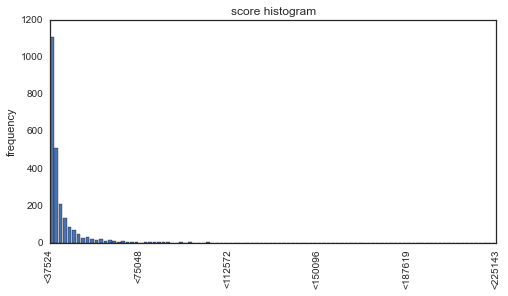

In [38]:
#create a histogram of a column's values
histdf=df1['score'].hist(bins=100)

Waiting on bqjob_r4241000db4cf6f9_0000014e99f249b1_47 ... (0s) Current status: DONE   
Waiting on bqjob_r26d0284dbcf0b787_0000014e99f25217_48 ... (0s) Current status: DONE   
Waiting on bqjob_r4db1b61142d1180b_0000014e99f259e0_49 ... (0s) Current status: DONE   


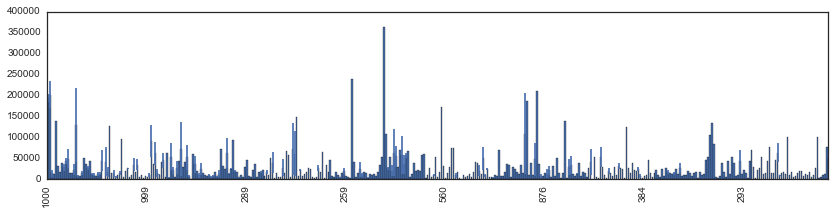

In [39]:
#create a simple plot (mean +/- 1 SEM) of value_col, broken down by grouping_col
value_col='score'
grouping_col='c_posts'
df1.plot(grouping_col, value_col, kind='bar')

Waiting on bqjob_r290ec64add5d7e21_0000014e911088c3_161 ... (0s) Current status: DONE   


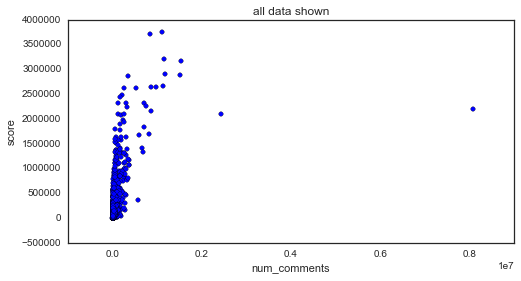

In [92]:
#create scatter plot of x vs. y (since bins > total number of datapoints, will plot all data)
scatterseries=df1.scatter('num_comments', 'score', bins=5000)

Waiting on bqjob_r58a74d50c6330cf8_0000014e92982c9f_529 ... (0s) Current status: DONE   
Waiting on bqjob_r40cba86ef3d62957_0000014e929844bc_532 ... (0s) Current status: DONE   
Waiting on bqjob_r6ccc16a7deb53d8b_0000014e92985a06_535 ... (0s) Current status: DONE   


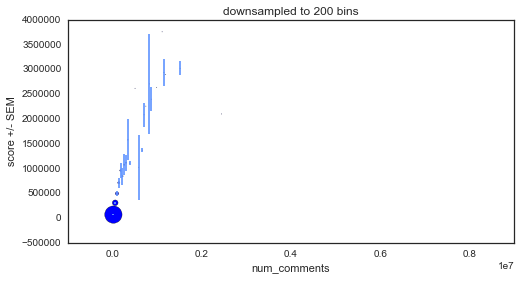

In [163]:
#create a downsampled scatter plot of x vs. y
plotdf=df1.scatter('num_comments', 'score', bins=200)

In [168]:
pd.read_csv?

In [173]:
x.head()

,date,Unnamed: 1,user,Unnamed: 3,query,Unnamed: 5,destination,Unnamed: 7,jobid,Unnamed: 9,duration_ms,Unnamed: 11,processed_mb,Unnamed: 13,cached,Unnamed: 15,Unnamed: 16
0,2015-07-15 12:39:19.990058,NaN,amy.skerry@gmail.com,NaN,SELECT COUNT(*) FROM [fh-bigquery:reddit.subre...,NaN,durable-footing-95814:_7f939837d73fe18145c1d22...,NaN,durable-footing-95814:bqjob_r4adefad0fcc80c86_...,NaN,0.234,NaN,0.000000,NaN,True,NaN,NaN
1,2015-07-15 12:39:25.143564,NaN,amy.skerry@gmail.com,NaN,SELECT * FROM [durable-footing-95814:_7f939837...,NaN,durable-footing-95814:_7f939837d73fe18145c1d22...,NaN,durable-footing-95814:bqjob_r6f4f2d092880a867_...,NaN,4.524,NaN,0.000008,NaN,False,NaN,NaN
2,2015-07-15 12:39:25.876279,NaN,amy.skerry@gmail.com,NaN,SELECT * FROM [durable-footing-95814:_7f939837...,NaN,durable-footing-95814:_7f939837d73fe18145c1d22...,NaN,durable-footing-95814:bqjob_r2a4a8f2694d53f51_...,NaN,0.276,NaN,0.000008,NaN,False,NaN,NaN
3,2015-07-15 12:39:26.688752,NaN,amy.skerry@gmail.com,NaN,SELECT MAX(num_comments) from [fh-bigquery:red...,NaN,durable-footing-95814:_7f939837d73fe18145c1d22...,NaN,durable-footing-95814:bqjob_r792beeb60d77b3d6_...,NaN,0.244,NaN,0.000000,NaN,True,NaN,NaN
4,2015-07-15 12:39:28.613983,NaN,amy.skerry@gmail.com,NaN,SELECT * FROM [durable-footing-95814:_7f939837...,NaN,durable-footing-95814:_7f939837d73fe18145c1d22...,NaN,durable-footing-95814:bqjob_r7dc88495f456a25e_...,NaN,0.549,NaN,0.000008,NaN,False,NaN,NaN


In [172]:
x=pd.read_csv('log.csv', delimiter='|')

##Misc

In [108]:
dir(client)

['CancelJob',
 'ConfigureFormatter',
 'ConstructObjectInfo',
 'ConstructObjectReference',
 'CopyTable',
 'CreateDataset',
 'CreateTable',
 'DatasetExists',
 'DeleteDataset',
 'DeleteTable',
 'ExecuteJob',
 'Extract',
 'FormatAcl',
 'FormatDatasetInfo',
 'FormatInfoByKind',
 'FormatJobInfo',
 'FormatProjectInfo',
 'FormatSchema',
 'FormatTableInfo',
 'FormatTime',
 'GetDatasetReference',
 'GetDiscoveryUrl',
 'GetHttp',
 'GetJobReference',
 'GetJobTypeName',
 'GetObjectInfo',
 'GetProjectReference',
 'GetQueryResults',
 'GetReference',
 'GetTableReference',
 'GetTableSchema',
 'InsertTableRows',
 'IsFailedJob',
 'ListDatasetRefs',
 'ListDatasets',
 'ListJobRefs',
 'ListJobs',
 'ListProjectRefs',
 'ListProjects',
 'ListTableRefs',
 'ListTables',
 'Load',
 'NormalizeWait',
 'PollJob',
 'ProcessSources',
 'Query',
 'QuietWaitPrinter',
 'RaiseError',
 'RaiseIfJobError',
 'ReadSchema',
 'ReadSchemaAndJobRows',
 'ReadSchemaAndRows',
 'RunJobSynchronously',
 'RunQuery',
 'RunQueryRpc',
 'StartJ

In [69]:
df1.__

In [22]:
df1['c_posts'].max()

1000

In [19]:
df1.active_col

'c_posts'

fetching from local cache
Waiting on bqjob_r44529bbf892c3acf_0000014e99f2f84a_50 ... (0s) Current status: DONE   
fetching from local cache
Waiting on bqjob_r753202acbb99d95c_0000014e99f2fb91_51 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon890d3b1624b81ee4d1c6ce5b9a77be86afef042a
returning head only
Waiting on bqjob_r2a283d53197b7fd1_0000014e99f302b3_52 ... (0s) Current status: DONE   
Waiting on bqjob_r5adb27092b35d68b_0000014e99f305c6_53 ... (0s) Current status: DONE   
Waiting on bqjob_r3925968cc4fcce66_0000014e99f30d67_54 ... (0s) Current status: DONE   
query saved to durable-footing-95814:_7f939837d73fe18145c1d220d8cea862f339ce2f.anon1ac174bbfb0a6e95deaed728b07e8d3bf7d26b8f
returning head only
Waiting on bqjob_r5a665ca29e94c008_0000014e99f3150c_55 ... (0s) Current status: DONE   
Waiting on bqjob_r5776cd4e888e6f10_0000014e99f31a07_56 ... (0s) Current status: DONE   
Waiting on bqjob_r3b9f50693fb5d9f2_0000014e9

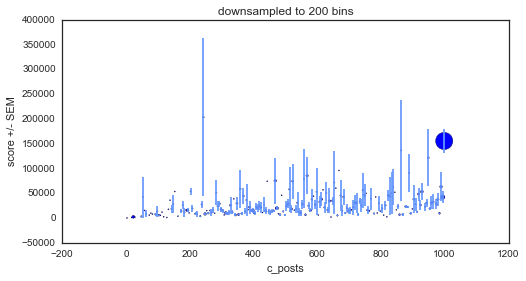

In [40]:
scatterseries=df1.scatter('c_posts', 'score')

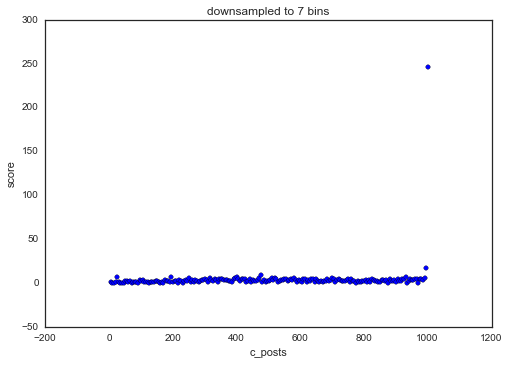

In [51]:
series=plot_scatter(scatterdf, 'c_posts', 'score')

In [59]:
plot_scatter?

In [62]:
plot_scatter.func_code

<code object plot_scatter at 0x109f927b0, file "<ipython-input-49-eb5bdebb588f>", line 1>

In [21]:
x=df1._limit_columns(['score', 'created_utc'])

In [42]:
service=util.get_service()

In [41]:
client.projects()

[autoreload of pybq.bqdf failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
NameError: name 'max_rows' is not defined
]


AttributeError: 'BigqueryClient' object has no attribute 'projects'

In [49]:
client.ListDatasets?

In [44]:
client.CopyTable?

In [46]:
client.GetDiscoveryUrl()

'https://www.googleapis.com/discovery/v1/apis/{api}/{apiVersion}/rest'

In [13]:
client.trace